# **Project Task 1**

*The goal of project is to Predict which Tweets are about real disasters and which ones are not. You have been provided with the data sets (test, train and sample submission). You have to use test and train data sets accordingly.
Twitter has become an important communication channel in times of emergency. The ubiquitousness of smartphones enables people to announce an emergency they’re observing in real-time. Because of this, more agencies are interested in programatically monitoring Twitter (i.e. disaster relief organizations and news agencies).
But, it’s not always clear whether a person’s words are actually announcing a disaster.
Take this example- "on Plus Side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE"
The author explicitly uses the word “ABLAZE” but means it metaphorically. This is clear to a human right away, especially with the visual aid. But it’s less clear to a machine.
In this task, you’re challenged to build a machine learning model that predicts which Tweets are about real disasters and which one’s aren’t. You’ll have access to a dataset of 10,000 tweets that were hand classified. Disclaimer: The dataset for this competition contains text that may be considered profane, vulgar, or offensive.*

***Importing Modules***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import re
import string

In [3]:
#Text blob for language processing

import textblob
from textblob import TextBlob
from textblob import Word

In [4]:
#nltk file import for nlp

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [5]:
import warnings
warnings.filterwarnings('ignore')

***Importing Dataset***

In [6]:
#importing train csv file

train = pd.read_csv('../input/project-given/train.csv')


#importing test csv file

test = pd.read_csv('../input/project-given/test.csv')

***Loading Dataset***

In [7]:
#checking train csv

train 

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [8]:
#checking test csv

test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [9]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [10]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [11]:
train.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [12]:
test.tail()

,id,keyword,location,text
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...
3262,10875,NaN,NaN,#CityofCalgary has activated its Municipal Eme...


In [13]:
train.describe

<bound method NDFrame.describe of          id keyword location  \
0         1     NaN      NaN   
1         4     NaN      NaN   
2         5     NaN      NaN   
3         6     NaN      NaN   
4         7     NaN      NaN   
...     ...     ...      ...   
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                   text  target  
0     Our Deeds are the Reason of this #earthquake M...       1  
1                Forest fire near La Ronge Sask. Canada       1  
2     All residents asked to 'shelter in place' are ...       1  
3     13,000 people receive #wildfires evacuation or...       1  
4     Just got sent this photo from Ruby #Alaska as ...       1  
...                                                 ...     ...  
7608  Two giant cranes holding a bridge collapse int...       1  
7609  @aria_ahrary @TheTawniest The out of control w.

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [15]:
train.shape

(7613, 5)

***Plotting Histogram***

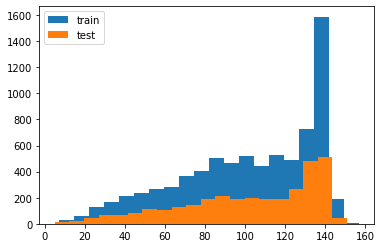

In [16]:
lenght_train = train['text'].str.len()
lenght_test = test['text'].str.len()

plt.hist(lenght_train,bins=20, label="train")
plt.hist(lenght_test,bins=20, label="test")
plt.legend()

#plotting graph
plt.show()

***Checking Word count, Character count, etc***

In [17]:
#word count

train['word_count'] = train['text'].apply(lambda x: len(str(x).split(" ")))
train[['text','word_count']].head()

,text,word_count
0,Our Deeds are the Reason of this #earthquake M...,13
1,Forest fire near La Ronge Sask. Canada,7
2,All residents asked to 'shelter in place' are ...,22
3,"13,000 people receive #wildfires evacuation or...",9
4,Just got sent this photo from Ruby #Alaska as ...,17


In [18]:
#chracter count

train['char_count'] = train['text'].str.len()
train[['text','char_count']].head()

,text,char_count
0,Our Deeds are the Reason of this #earthquake M...,69
1,Forest fire near La Ronge Sask. Canada,38
2,All residents asked to 'shelter in place' are ...,133
3,"13,000 people receive #wildfires evacuation or...",65
4,Just got sent this photo from Ruby #Alaska as ...,88


In [19]:
#average word

def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

train['avg_word'] = train['text'].apply(lambda x: avg_word(x))
train[['text','avg_word']].head()

,text,avg_word
0,Our Deeds are the Reason of this #earthquake M...,4.384615
1,Forest fire near La Ronge Sask. Canada,4.571429
2,All residents asked to 'shelter in place' are ...,5.090909
3,"13,000 people receive #wildfires evacuation or...",7.125000
4,Just got sent this photo from Ruby #Alaska as ...,4.500000


In [20]:
#stopword count

stop = stopwords.words('english')

train['stopwords'] = train['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
train[['text','stopwords']].head()

,text,stopwords
0,Our Deeds are the Reason of this #earthquake M...,5
1,Forest fire near La Ronge Sask. Canada,0
2,All residents asked to 'shelter in place' are ...,9
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,6


In [21]:
#hastags count

train['hastags'] = train['text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
train[['text','hastags']].head()

,text,hastags
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,0
2,All residents asked to 'shelter in place' are ...,0
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,2


In [22]:
#checking count of disaster and non-disaster tweets 

train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

***Removing Extra labels***

In [23]:
#dropping extra columns from file

train = train.drop('word_count', axis=1)
train = train.drop('char_count',axis=1)
train = train.drop('avg_word',axis=1)
train = train.drop('hastags', axis=1)
train = train.drop('stopwords',axis=1)

***Preprocessing Dataset***

In [24]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [25]:
#lowercasing all words in text

train['text'] = train['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
train['text'].head()

0    our deeds are the reason of this #earthquake m...
1               forest fire near la ronge sask. canada
2    all residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    just got sent this photo from ruby #alaska as ...
Name: text, dtype: object

In [26]:
#remove special characters from text

train['text'] = train['text'].str.replace("[^a-zA-Z#]"," ")
train['text'].head()

0    our deeds are the reason of this #earthquake m...
1               forest fire near la ronge sask  canada
2    all residents asked to  shelter in place  are ...
3           people receive #wildfires evacuation or...
4    just got sent this photo from ruby #alaska as ...
Name: text, dtype: object

In [27]:
#remove punctuations

train['text'] = train['text'].str.replace('[^\w\s]','')
train['text'].head()

0    our deeds are the reason of this earthquake ma...
1               forest fire near la ronge sask  canada
2    all residents asked to  shelter in place  are ...
3           people receive wildfires evacuation ord...
4    just got sent this photo from ruby alaska as s...
Name: text, dtype: object

In [28]:
#remove stopwords

stop = stopwords.words('english')
train['text'] = train['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
train['text'].head()

0         deeds reason earthquake may allah forgive us
1                forest fire near la ronge sask canada
2    residents asked shelter place notified officer...
3    people receive wildfires evacuation orders cal...
4    got sent photo ruby alaska smoke wildfires pou...
Name: text, dtype: object

In [29]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,deeds reason earthquake may allah forgive us,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,residents asked shelter place notified officer...,1
3,6,NaN,NaN,people receive wildfires evacuation orders cal...,1
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfires pou...,1


In [30]:
#common/frequent words

freq = pd.Series(' '.join(train['text']).split()).value_counts()[:10]
freq

co       4741
http     4309
https     412
like      348
amp       344
fire      254
get       229
new       228
via       220
u         216
dtype: int64

In [31]:
#removing common words

freq = list(freq.index)
train['text'] = train['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
train['text'].head()

0         deeds reason earthquake may allah forgive us
1                     forest near la ronge sask canada
2    residents asked shelter place notified officer...
3    people receive wildfires evacuation orders cal...
4    got sent photo ruby alaska smoke wildfires pou...
Name: text, dtype: object

In [32]:
#rare words

freq = pd.Series(' '.join(train['text']).split()).value_counts()[-10:]
freq

nottingham    1
ucihrrn       1
autoames      1
ventilated    1
bandolier     1
dix           1
nljvp         1
vfyz          1
fiya          1
rskq          1
dtype: int64

In [33]:
#removing rare words

freq = list(freq.index)
train['text'] = train['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
train['text'].head()

0         deeds reason earthquake may allah forgive us
1                     forest near la ronge sask canada
2    residents asked shelter place notified officer...
3    people receive wildfires evacuation orders cal...
4    got sent photo ruby alaska smoke wildfires pou...
Name: text, dtype: object

In [34]:
#text/spelling correction

train['text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0         deeds reason earthquake may allah forgive us
1                      forest near la range ask canada
2    residents asked shelter place notified officer...
3    people receive wildfires evacuation orders cal...
4    got sent photo ruby alaska smoke wildfires hou...
Name: text, dtype: object

In [35]:
# removing short words ie.word of size 2 or less

train['text'] = train['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,deeds reason earthquake may allah forgive,1
1,4,NaN,NaN,forest near ronge sask canada,1
2,5,NaN,NaN,residents asked shelter place notified officer...,1
3,6,NaN,NaN,people receive wildfires evacuation orders cal...,1
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfires pou...,1


In [36]:
#Removing spaces at the beginning and at the end of the string

train['text'] = train['text'].str.strip()
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,deeds reason earthquake may allah forgive,1
1,4,NaN,NaN,forest near ronge sask canada,1
2,5,NaN,NaN,residents asked shelter place notified officer...,1
3,6,NaN,NaN,people receive wildfires evacuation orders cal...,1
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfires pou...,1


***Stemming***

In [37]:
st = PorterStemmer()
train['text'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0               deed reason earthquak may allah forgiv
1                         forest near rong sask canada
2    resid ask shelter place notifi offic evacu she...
3          peopl receiv wildfir evacu order california
4    got sent photo rubi alaska smoke wildfir pour ...
Name: text, dtype: object

***Lemmatization***

In [38]:
train['text'] = train['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
train['text'].head()

0             deed reason earthquake may allah forgive
1                        forest near ronge sask canada
2    resident asked shelter place notified officer ...
3    people receive wildfire evacuation order calif...
4    got sent photo ruby alaska smoke wildfire pour...
Name: text, dtype: object

***TFIDF***

*Syntax*


*from sklearn.feature_extraction.text import TfidfVectorizer*


*tfidf = TfidfVectorizer(max_features=20000, lowercase=True, analyzer='word',
stop_words= 'english',ngram_range=(1,1))
train_vect = tfidf.fit_transform(train['text'])*


*train_vect*

***Bag of Word***

*Syntax*


*from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=20000, lowercase=True, ngram_range=(1,1),analyzer = "word")*


*train_bow = bow.fit_transform(train['text'])*


*train_bow*

***Sentiment Analysis***

In [39]:
train['text'][:5].apply(lambda x: TextBlob(x).sentiment)
train['sentiment'] = train['text'].apply(lambda x: TextBlob(x).sentiment[0] )
train[['text','sentiment']].head()

,text,sentiment
0,deed reason earthquake may allah forgive,0.0
1,forest near ronge sask canada,0.1
2,resident asked shelter place notified officer ...,-0.1
3,people receive wildfire evacuation order calif...,0.0
4,got sent photo ruby alaska smoke wildfire pour...,0.0


***Wordcloud***

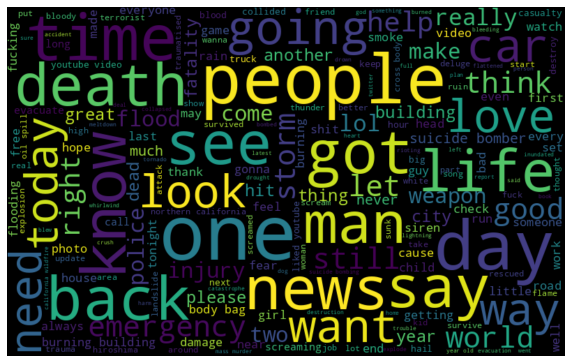

In [40]:
#Complete Wordcloud

all_words = ' '.join([text for text in train['text']]) 

from wordcloud import WordCloud

wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

plt.show()

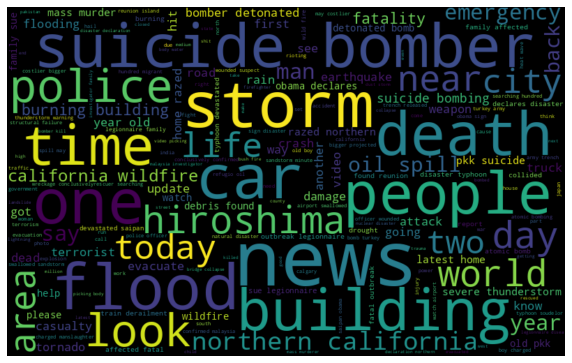

In [41]:
#Disaster Wordcloud

normal_words = ' '.join([text for text in train['text'][train['target'] == 1]])

wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size = 110).generate(normal_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation ='bilinear')
plt.axis('off')

plt.show()

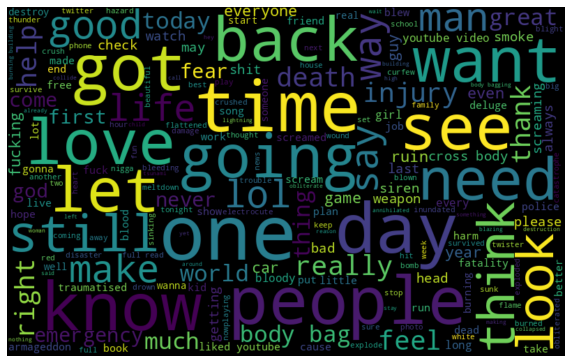

In [42]:
#Non-Disaster Wordcloud

normal_words = ' '.join([text for text in train['text'][train['target'] == 0]])

wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size = 110).generate(normal_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')

plt.show()

***Checking Column with Null value***

In [43]:
train.isnull().sum()

id              0
keyword        61
location     2533
text            0
target          0
sentiment       0
dtype: int64

In [44]:
#Dropping Columns with null value

train = train.drop([ 'keyword', 'location'], axis = 1)

In [45]:
train.head()

,id,text,target,sentiment
0,1,deed reason earthquake may allah forgive,1,0.0
1,4,forest near ronge sask canada,1,0.1
2,5,resident asked shelter place notified officer ...,1,-0.1
3,6,people receive wildfire evacuation order calif...,1,0.0
4,7,got sent photo ruby alaska smoke wildfire pour...,1,0.0


In [46]:
#Checking null

train.isnull().sum()

id           0
text         0
target       0
sentiment    0
dtype: int64

In [47]:
train

,id,text,target,sentiment
0,1,deed reason earthquake may allah forgive,1,0.000000
1,4,forest near ronge sask canada,1,0.100000
2,5,resident asked shelter place notified officer ...,1,-0.100000
3,6,people receive wildfire evacuation order calif...,1,0.000000
4,7,got sent photo ruby alaska smoke wildfire pour...,1,0.000000
...,...,...,...,...
7608,10869,two giant crane holding bridge collapse nearby...,1,0.000000
7609,10870,aria ahrary thetawniest control wild fire cali...,1,0.100000
7610,10871,utc volcano hawaii zdtoyd ebj,1,0.000000
7611,10872,police investigating bike collided car little ...,1,-0.260417


***Spliting for Naive Bayes Algorithm***

In [48]:
#Importing Library

from sklearn.model_selection import train_test_split

In [49]:
#Defining X and y

X = train['text']
y = train['target']

X_train, X_value, y_train, y_value = train_test_split(X, y, test_size = 0.25, random_state=42)

X_train.head()

5151    dicehateme puppyshogun make sense paper beat r...
6351    catoinstitute cause federal failure deeply str...
3443    well chaning ipad screen fucking exploded glas...
7164                             war drug turned war zone
7037    obama declares disaster typhoon devastated saipan
Name: text, dtype: object

***NLTK's Word tokenization import***

In [50]:
from nltk.tokenize import word_tokenize 

In [51]:
X_token = X_train.apply(word_tokenize)
X_value_token = X_value.apply(word_tokenize)

In [52]:
X_token 

5151    [dicehateme, puppyshogun, make, sense, paper, ...
6351    [catoinstitute, cause, federal, failure, deepl...
3443    [well, chaning, ipad, screen, fucking, explode...
7164                       [war, drug, turned, war, zone]
7037    [obama, declares, disaster, typhoon, devastate...
                              ...                        
5226    [eganator, many, obliteration, server, always,...
5390    [panic, attack, enough, money, drug, alcohol, ...
860     [omron, hem, automatic, blood, pressure, monit...
7603    [official, say, quarantine, place, alabama, ho...
7270    [moved, england, five, year, ago, today, whirl...
Name: text, Length: 5709, dtype: object

In [53]:
X_value_token

2644             [weapon, cause, imaginable, destruction]
2227    [ing, thing, gishwhes, got, soaked, deluge, go...
5448    [georgegalloway, galloway, mayor, col, police,...
132     [aftershock, back, school, kick, great, want, ...
6845    [response, trauma, child, addict, develop, def...
                              ...                        
5209    [glad, got, obliterated, men, first, class, fu...
387     [mourning, notice, stabbing, arson, victim, st...
4848    [mass, murderer, che, guevara, greeting, woman...
1032    [woman, flower, printed, shoulder, handbag, cr...
7195           [abcnews, nuclear, bomb, terrible, weapon]
Name: text, Length: 1904, dtype: object

In [54]:
def listToString(list): 
    string = "" 
    for element in list: 
        string += element 
    return string

In [55]:
X_token_str = X_train.apply(listToString)
X_value_token_str = X_value.apply(listToString)

In [56]:
from sklearn.feature_extraction.text import CountVectorizer 

vec = CountVectorizer(max_df=0.90 ,min_df=2 , max_features=1000,stop_words='english')
X_train = vec.fit_transform(X_token_str).toarray()
X_value_test = vec.transform(X_value_token_str).toarray()

In [57]:
#Printing value of Variables

print("X_train_shape : ",X_train.shape)
print("X_value_test_shape : ",X_value_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_value_shape : ",y_value.shape)

X_train_shape :  (5709, 1000)
X_value_test_shape :  (1904, 1000)
y_train_shape :  (5709,)
y_value_shape :  (1904,)


In [58]:
# Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB  

model_naive = MultinomialNB().fit(X_train, y_train) 
predicted_naive = model_naive.predict(X_value_test)

***Printing Confusion Matrix***

***True Positive:***
*Interpretation: You predicted positive and it’s true.*


***True Negative:***
*Interpretation: You predicted negative and it’s true.*


***False Positive: (Type 1 Error)***
*Interpretation: You predicted positive and it’s false.*


***False Negative: (Type 2 Error)***
*Interpretation: You predicted negative and it’s false.*

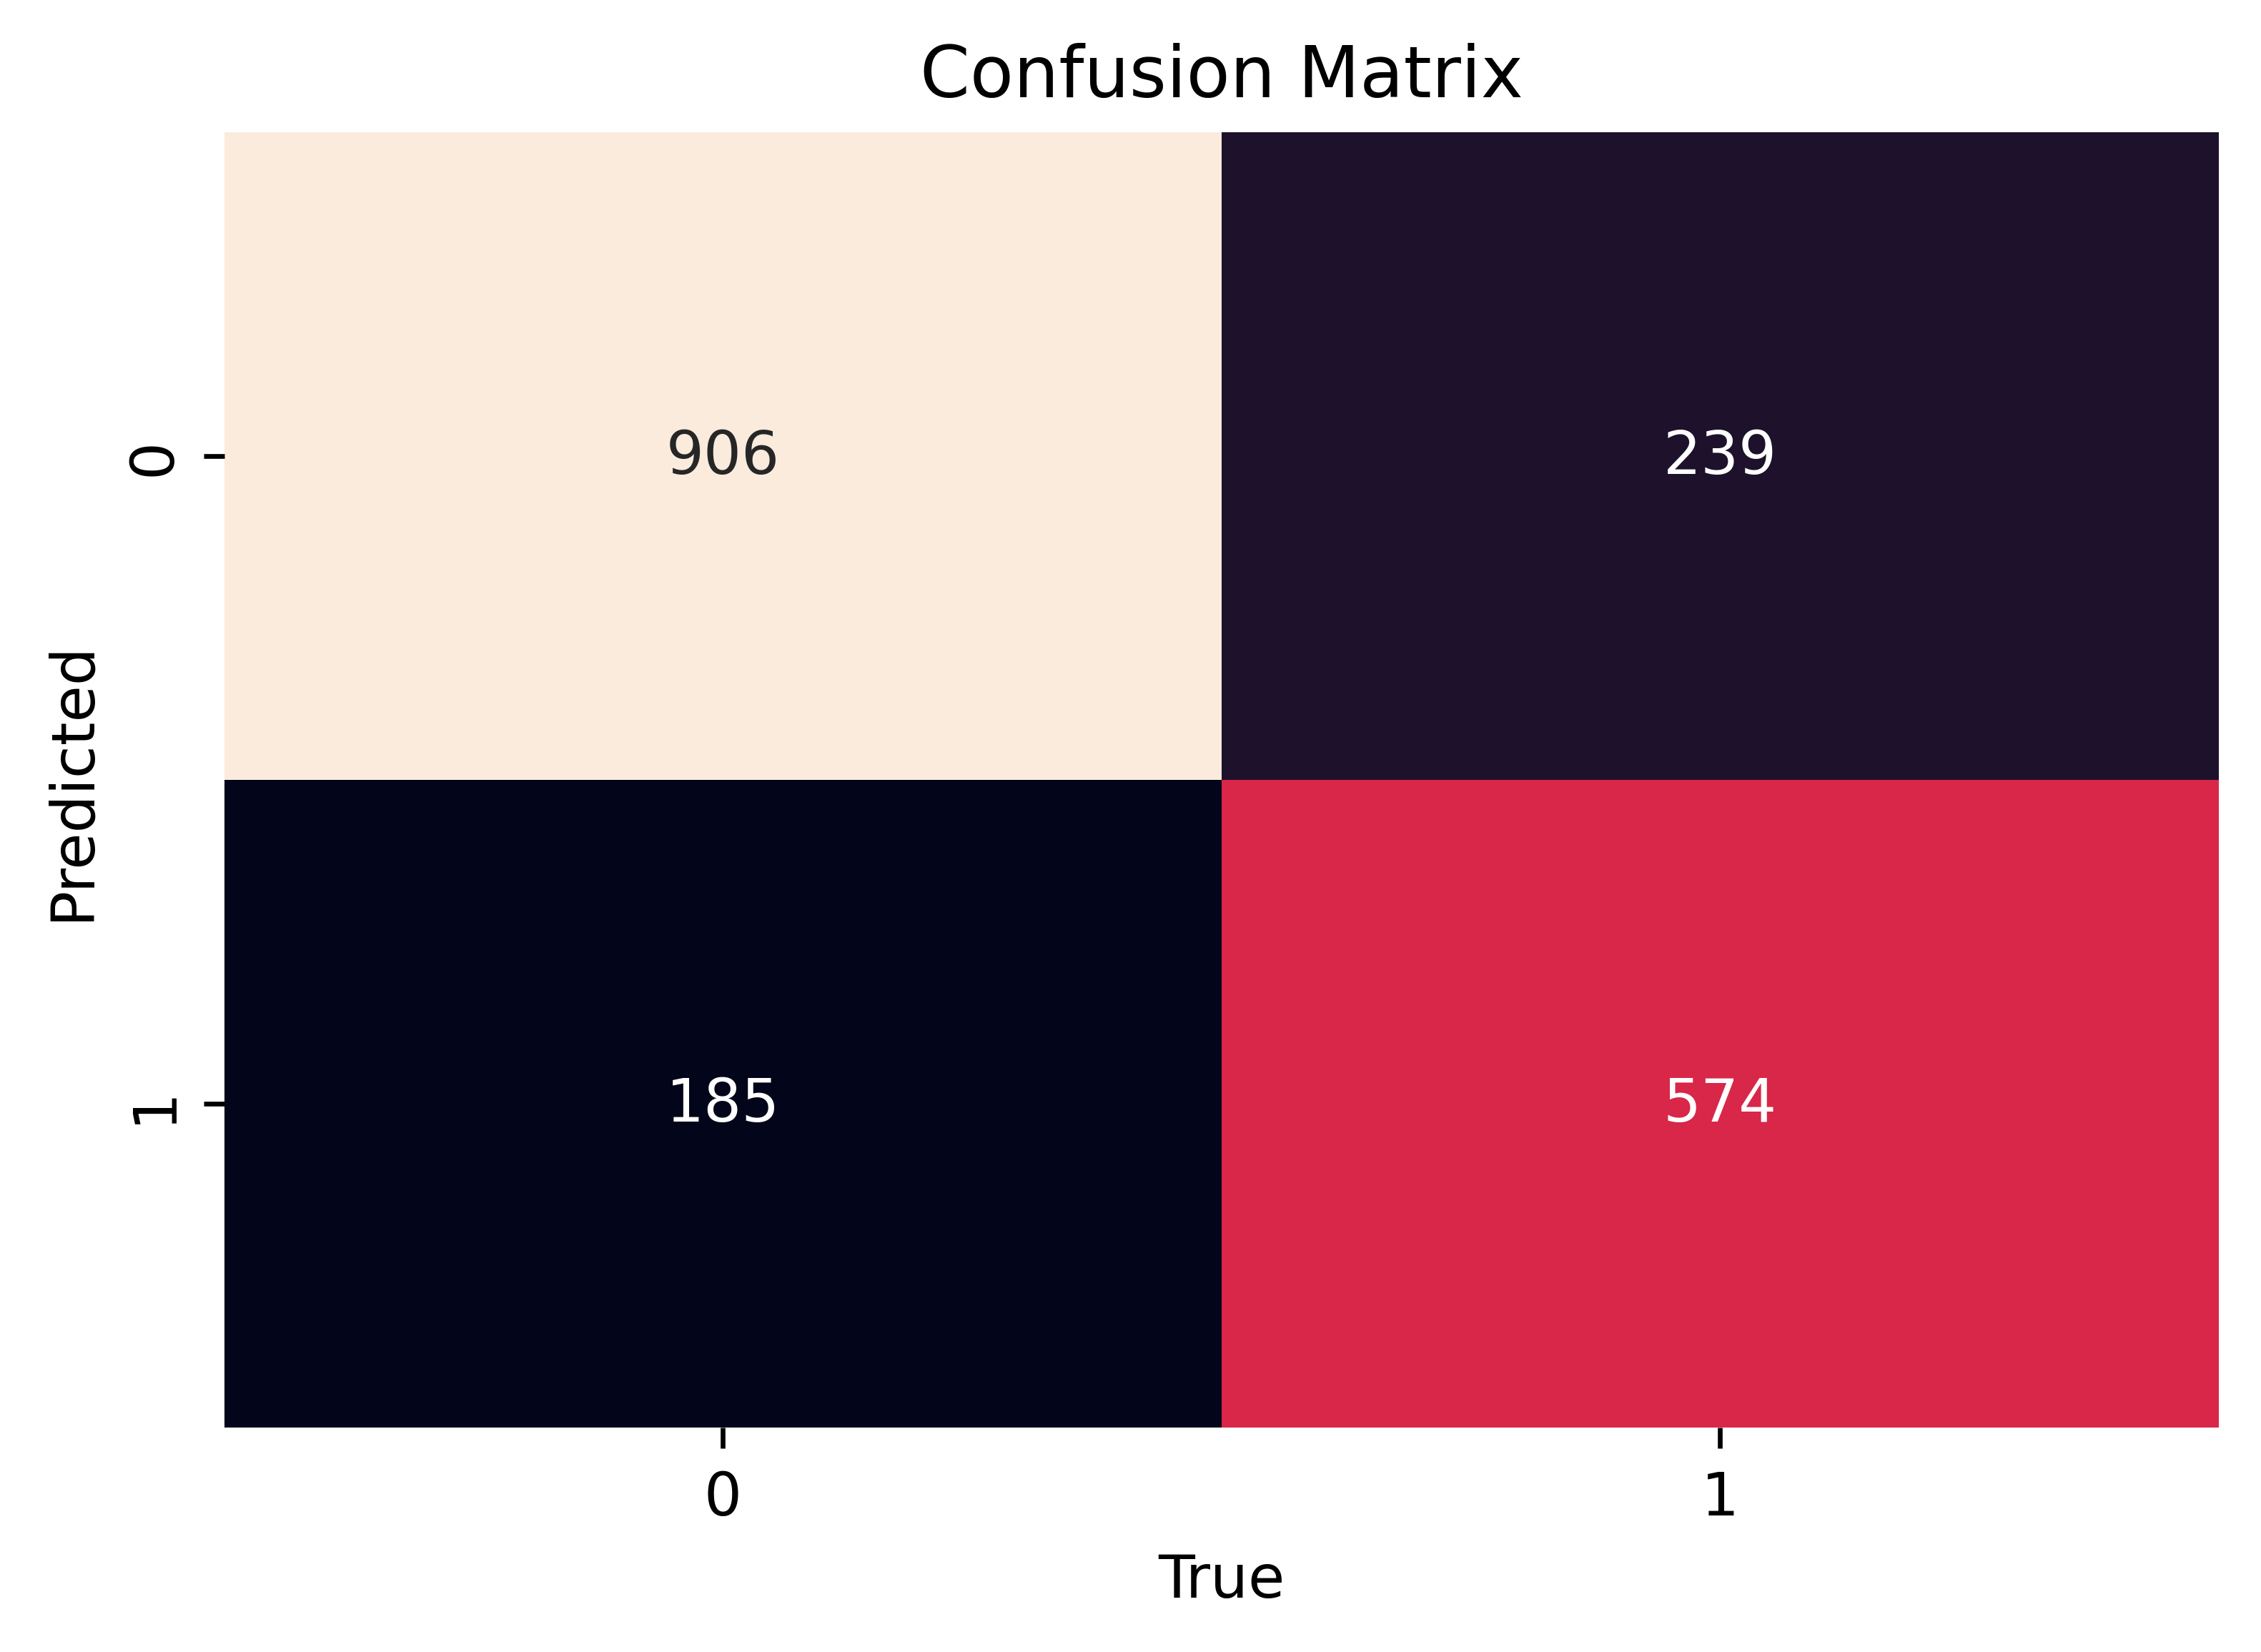

In [59]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=600)
mat = confusion_matrix(y_value, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

***Calculating Accuracy***

In [60]:
#Calculating Accuracy with model

from sklearn.metrics import accuracy_score

score_naive = accuracy_score(predicted_naive, y_value)
print("Accuracy with Naive-bayes model for disaster prediction: ",score_naive)

Accuracy with Naive-bayes model for disaster prediction:  0.7773109243697479


***Accuracy with Naive-bayes model:*** 

# 0.7773109243697479

***Prediction on given test set***

In [61]:
ID = test['id']
test = test['text']

test = test.apply(word_tokenize)
test = test.apply(listToString)

test_vector = vec.transform(test).toarray()

prediction = model_naive.predict(test_vector)

In [62]:
prediction

array([0, 0, 0, ..., 0, 0, 0])

***Printing Prediction in Submission csv***

In [63]:
prediction = pd.Series(prediction)
ids = pd.Series(ID)

predict_csv = pd.concat([ids, prediction], keys = ['id', 'target'], axis = 1)

predict_csv.to_csv('submission_deepak.csv',index = False)

***Checking Submission csv***

In [64]:
#importing submission_deepak csv file

submission = pd.read_csv('submission_deepak.csv')

In [65]:
submission

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


In [66]:
submission.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
